In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Loading the new dataset:
df = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv")

df.head()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,25.001104,2.501652,4.923679,25.001104,1.250055,3.907976,3.763026,...,9.918524,67.526731,284.075684,8.877365,764.0,32.0,100.0,119.0,7.777778,4.666667
1,1.0,0.0,0.0,20.274271,2.409184,4.779725,20.274271,1.267142,3.699349,3.675755,...,9.636588,61.986524,226.038985,9.827782,429.0,23.0,82.0,96.0,6.166667,3.583333
2,1.0,0.0,0.0,23.679070,2.528665,4.931112,23.679070,1.392886,3.823524,3.787841,...,10.022647,65.026165,223.074562,8.579791,461.0,29.0,98.0,121.0,3.416667,3.638889
3,1.0,0.0,0.0,27.774585,2.557762,4.967131,27.774585,1.388729,4.000936,4.113451,...,10.250228,70.773493,266.069142,8.868971,735.0,35.0,120.0,150.0,3.888889,4.166667
4,1.0,0.0,0.0,39.613943,2.477563,4.835703,39.613943,1.320465,4.331178,4.133872,...,10.233043,79.537169,415.183067,7.548783,2674.0,45.0,156.0,182.0,8.500000,6.694444


In [3]:
# Importing the required libraries and modules for Random Forest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Features and Parameters 
X = df.drop("cls", axis=1)
y = df["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Unnecessary step, but scaling the dataset
# not so unnecessary step, this scaling seems to make a big difference

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Using Random Forest Classifier: 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.87


In [9]:
test_data = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_testset.csv")
test_data.head()



,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,27.088019,2.445165,4.890329,27.088019,1.231274,4.001574,3.958514,...,10.032189,56.149665,323.099143,8.077479,1090.0,35.0,112.0,130.0,8.979167,4.875000
1,1.0,0.0,0.0,37.050045,2.328086,4.614018,37.050045,1.277588,4.276564,4.773032,...,9.990720,77.406545,428.097683,8.736687,2803.0,39.0,144.0,163.0,9.138889,6.611111
2,1.0,0.0,2.0,32.096537,2.450210,4.747965,32.096537,1.283861,4.142878,3.746826,...,9.975576,75.253570,372.071468,9.074914,1688.0,35.0,128.0,149.0,8.138889,5.555556
3,1.0,0.0,0.0,45.263137,2.460053,4.890810,45.263137,1.293232,4.479404,4.901285,...,10.388595,86.901917,531.115018,8.566371,3487.0,54.0,182.0,214.0,11.583333,7.777778
4,1.0,0.0,0.0,43.807444,2.482121,4.964016,43.807444,1.288454,4.452201,4.590124,...,10.429547,83.429320,494.106706,8.668539,3362.0,53.0,178.0,208.0,10.812500,7.416667


In [11]:
X_test = df.drop("cls", axis=1)
y_test = df["cls"]
X_test_imputed = imputer.transform(X_test)

Accuracy: 0.97225


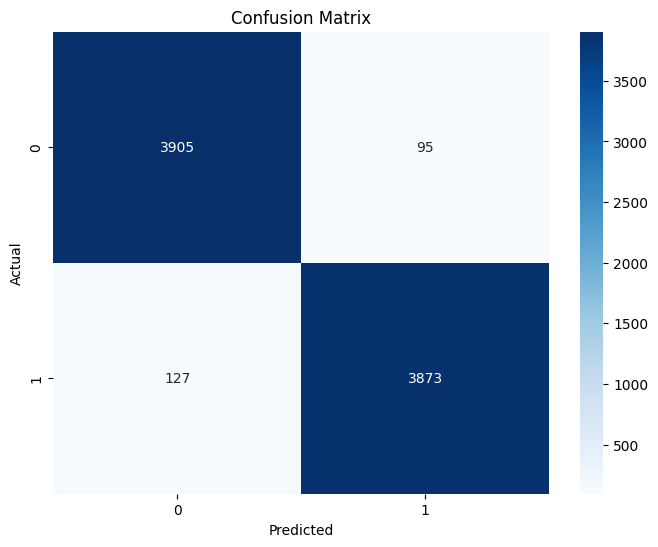

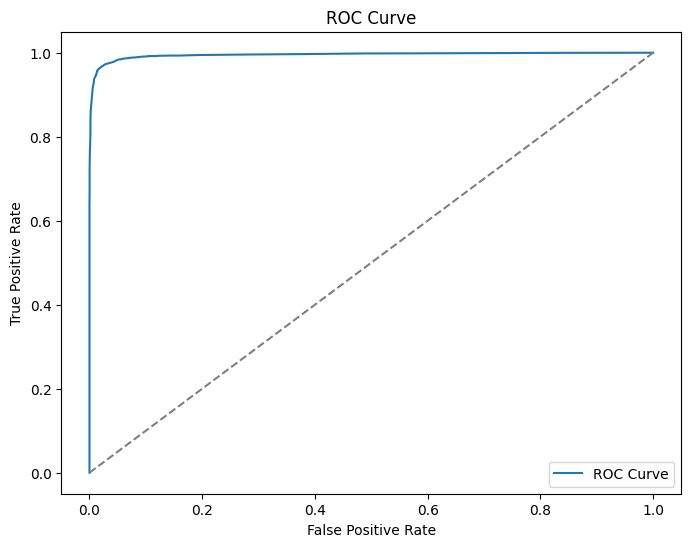

ROC AUC Score: 0.99492378125


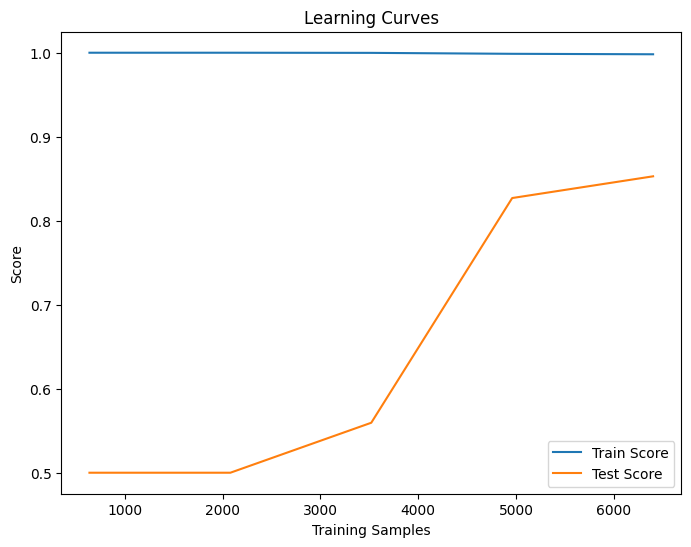

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Model accuracy
y_pred = rf_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = rf_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_test_imputed, y_test, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
)
plt.figure(figsize=(8, 6))
plt.plot(
    train_sizes, np.mean(train_scores, axis=1), label="Train Score"
)
plt.plot(
    train_sizes, np.mean(test_scores, axis=1), label="Test Score"
)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()


# # Feature Importance Plot
# if hasattr(rf_model, "feature_importances_"):
#     importances = rf_model.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x=importances[indices], y=range(len(indices)))
#     feature_names = X_test.columns
#     plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation='vertical')
#     plt.xlabel("Feature")
#     plt.ylabel("Importance")
#     plt.title("Feature Importance Plot")
#     plt.tight_layout()
#     plt.show()


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load your dataset and split into features (X) and target (y)

# Create the model
model = RandomForestClassifier()

# Choose the number of folds (K)
k = 5

# Create K-Fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate the model using cross_val_score
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate the average accuracy across all folds
average_accuracy = scores.mean()
print(f"Average Accuracy: {average_accuracy:.4f}")


Fold 1: Accuracy = 0.8644
Fold 2: Accuracy = 0.8862
Fold 3: Accuracy = 0.8769
Fold 4: Accuracy = 0.8775
Fold 5: Accuracy = 0.8650
Average Accuracy: 0.8740


In [15]:
df = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv")

df.head()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,25.001104,2.501652,4.923679,25.001104,1.250055,3.907976,3.763026,...,9.918524,67.526731,284.075684,8.877365,764.0,32.0,100.0,119.0,7.777778,4.666667
1,1.0,0.0,0.0,20.274271,2.409184,4.779725,20.274271,1.267142,3.699349,3.675755,...,9.636588,61.986524,226.038985,9.827782,429.0,23.0,82.0,96.0,6.166667,3.583333
2,1.0,0.0,0.0,23.679070,2.528665,4.931112,23.679070,1.392886,3.823524,3.787841,...,10.022647,65.026165,223.074562,8.579791,461.0,29.0,98.0,121.0,3.416667,3.638889
3,1.0,0.0,0.0,27.774585,2.557762,4.967131,27.774585,1.388729,4.000936,4.113451,...,10.250228,70.773493,266.069142,8.868971,735.0,35.0,120.0,150.0,3.888889,4.166667
4,1.0,0.0,0.0,39.613943,2.477563,4.835703,39.613943,1.320465,4.331178,4.133872,...,10.233043,79.537169,415.183067,7.548783,2674.0,45.0,156.0,182.0,8.500000,6.694444


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Features and Parameters 
X = df.drop("cls", axis=1)
y = df["cls"]

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load your dataset and split into features (X) and target (y)

# Create the model
model = RandomForestClassifier()

# Choose the number of folds (K)
k = 100

# Create K-Fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate the model using cross_val_score
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate the average accuracy across all folds
average_accuracy = scores.mean()
print(f"Average Accuracy: {average_accuracy:.4f}")

Fold 1: Accuracy = 0.8500
Fold 2: Accuracy = 0.8625
Fold 3: Accuracy = 0.8625
Fold 4: Accuracy = 0.8625
Fold 5: Accuracy = 0.8750
Fold 6: Accuracy = 0.8375
Fold 7: Accuracy = 0.9500
Fold 8: Accuracy = 0.8875
Fold 9: Accuracy = 0.8250
Fold 10: Accuracy = 0.8875
Fold 11: Accuracy = 0.9125
Fold 12: Accuracy = 0.8625
Fold 13: Accuracy = 0.8000
Fold 14: Accuracy = 0.9125
Fold 15: Accuracy = 0.8375
Fold 16: Accuracy = 0.8750
Fold 17: Accuracy = 0.8125
Fold 18: Accuracy = 0.8750
Fold 19: Accuracy = 0.8625
Fold 20: Accuracy = 0.7875
Fold 21: Accuracy = 0.8125
Fold 22: Accuracy = 0.8625
Fold 23: Accuracy = 0.9250
Fold 24: Accuracy = 0.8875
Fold 25: Accuracy = 0.9125
Fold 26: Accuracy = 0.8875
Fold 27: Accuracy = 0.8625
Fold 28: Accuracy = 0.8500
Fold 29: Accuracy = 0.8875
Fold 30: Accuracy = 0.8750
Fold 31: Accuracy = 0.8625
Fold 32: Accuracy = 0.8875
Fold 33: Accuracy = 0.9250
Fold 34: Accuracy = 0.9375
Fold 35: Accuracy = 0.8875
Fold 36: Accuracy = 0.9000
Fold 37: Accuracy = 0.9000
Fold 38: A

In [23]:
max(scores)

0.95

In [24]:
min(scores)

0.7875